In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [2]:
import pandas as pd

In [3]:
tf.random.set_seed(42)

X, y = make_moons(n_samples=500, noise=0.03, random_state=42)
X.shape, y.shape

((500, 2), (500,))

<Axes: xlabel='x0', ylabel='x1'>

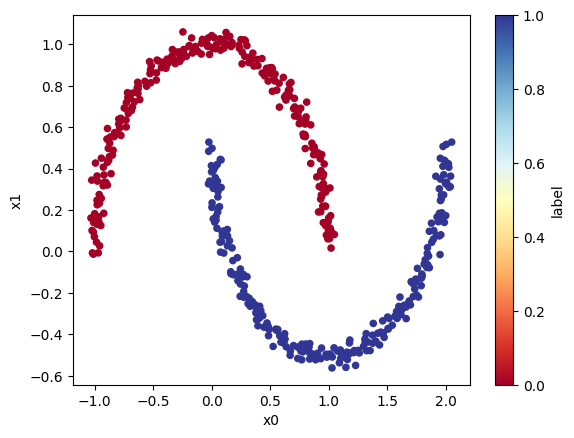

In [5]:
df = pd.DataFrame({
    'x0':X[:,0],
    'x1':X[:,1],
    'label':y
})

df.plot(kind='scatter', x='x0', y='x1', c='label', cmap=plt.cm.RdYlBu)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(400, 2)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_history = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
13/13 [==============================] - 2s 3ms/step - loss: 0.6878 - accuracy: 0.4500
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.6525
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.7775
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.7875
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6468 - accuracy: 0.7875
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6311 - accuracy: 0.7825
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6137 - accuracy: 0.7800
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.7800
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5765 - accuracy: 0.7900
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5583 - accuracy: 0.7900
Epoch 11/

In [9]:
pred = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [16]:
pred[0]

array([0.9999593], dtype=float32)

In [17]:
pred = pred.round()

In [10]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 1s 8ms/step - loss: 0.0046 - accuracy: 1.0000


[0.0046052574180066586, 1.0]

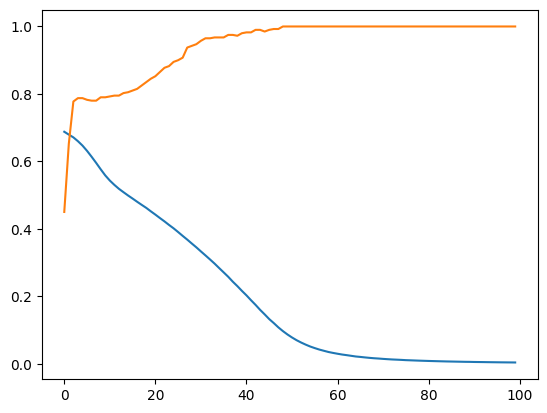

In [15]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['accuracy'])

In [18]:
df_pred = pd.DataFrame({
    'x0':X_test[:,0],
    'x1':X_test[:,1],
    'label':y_test,
    'pred':pred.flatten()
})

<Axes: xlabel='x0', ylabel='x1'>

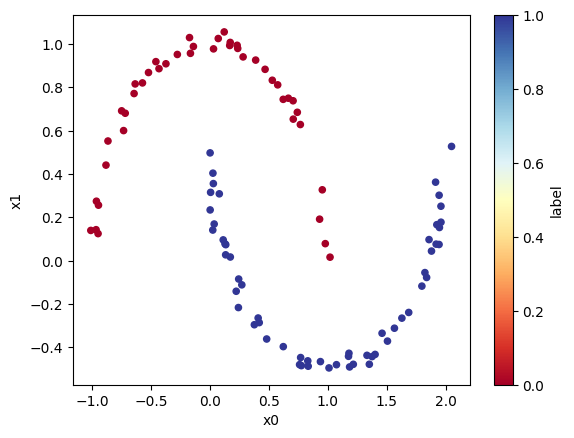

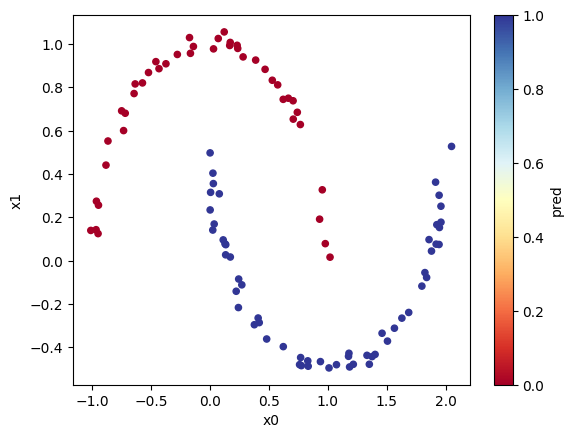

In [19]:
df_pred.plot(kind='scatter', x='x0', y='x1', c='label', cmap=plt.cm.RdYlBu)
df_pred.plot(kind='scatter', x='x0', y='x1', c='pred', cmap=plt.cm.RdYlBu)